#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [62]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Veg_dat/Veg_test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4864 files belonging to 14 classes.


##Validation Image Preprocessing

In [63]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Veg_dat/Veg_test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4864 files belonging to 14 classes.


#Building Model

In [64]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [65]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [68]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [69]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [78]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=14,activation='softmax'))

#Compiling and Training Phase

In [71]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6, 6, 36)            │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,764 (553.77 KB)

 Trainable params: 141,764 (553.77 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 14), output.shape=(None, 6, 6, 14)

##Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 598ms/step - accuracy: 0.9696 - loss: 0.1279
Training accuracy: 0.9736757874488831


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 681ms/step - accuracy: 0.9470 - loss: 0.4717
Validation accuracy: 0.9515669345855713


##Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.02857142873108387,
  0.03627608343958855,
  0.034991975873708725,
  0.04333868250250816,
  0.045264847576618195,
  0.06260032206773758,
  0.0882825031876564,
  0.10722311586141586,
  0.1544141322374344,
  0.20642054080963135,
  0.25232744216918945,
  0.31396469473838806,
  0.37528088688850403,
  0.43531301617622375,
  0.4911717474460602,
  0.5634028911590576,
  0.6160513758659363,
  0.6497592329978943,
  0.6895666122436523,
  0.7380417585372925,
  0.7473515272140503,
  0.7849116921424866,
  0.8032102584838867,
  0.8170144557952881,
  0.837239146232605,
  0.8677367568016052,
  0.8555377125740051,
  0.8520064353942871,
  0.8812199234962463,
  0.8982343673706055,
  0.8895666003227234,
  0.9069020748138428],
 'loss': [6.379574775695801,
  3.5733494758605957,
  3.5738039016723633,
  3.5311267375946045,
  3.542741060256958,
  3.4656667709350586,
  3.39949893951416,
  3.3371307849884033,
  3.2062079906463623,
  2.9982123374938965,
  2.7516348361968994,
  2.502516746520996,
  2

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.15669345855713 %


#Accuracy Visualization

##Training Visualization

In [ ]:
#training_history.history['accuracy']

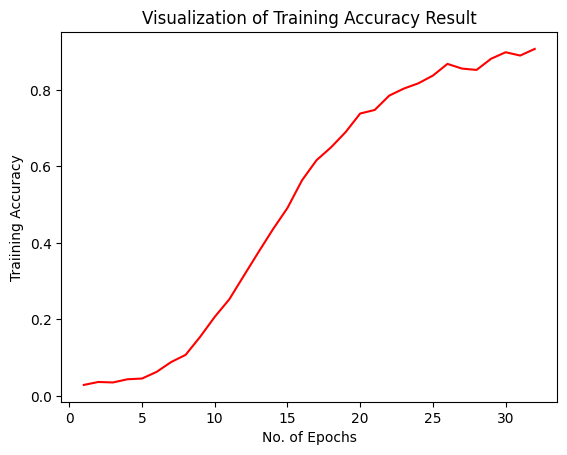

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

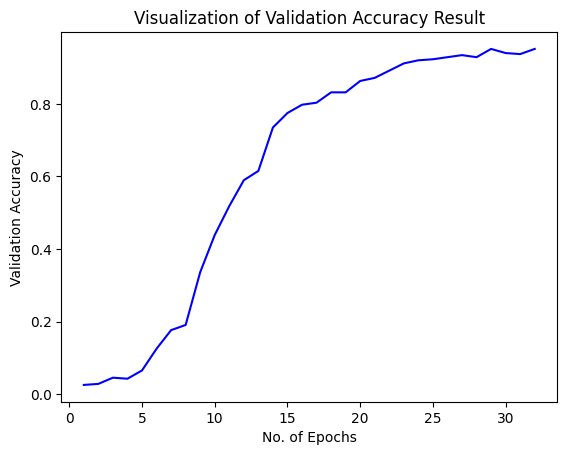

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [61]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Veg_dat/Veg_test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4864 files belonging to 14 classes.


In [60]:
import tensorflow as tf

# ... (your model definition) ...

# Assuming your model's output layer has 10 neurons (10 classes)
# and your test data has 36 classes:

# Modify the final layer of your model to have 36 neurons:
cnn.add(tf.keras.layers.Dense(36, activation='softmax'))

# Recompile the model:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy'])

# Regenerate your test_set with the correct label_mode:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Veg_dataset/test',
    labels="inferred",
    label_mode="categorical",  # Keep label_mode as "categorical" for one-hot encoded labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

test_loss, test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

Found 352 files belonging to 36 classes.
11/11 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.0222 - loss: 3.5848
Test accuracy: 0.028409091755747795
